In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [17]:
# df = pd.read_csv('final.csv', header = None, sep=",")

# print(len(df.columns))

# colnames = ['timestamp', 'faceID']
# for i in range(0,len(df.columns)-2):
#     colnames.append(i)
# df.columns = colnames
# # print(df.head())



# Xdf = df.drop(['timestamp','faceID'], axis = 1)
# # print(Xdf.head())



In [5]:
df = pd.read_csv('/home/sushant/test_tsne_speaker.csv', header = None, sep=",")
print (df.head())
Xdf=df


         0         1         2         3         4         5         6   \
0  0.281492  0.077581 -0.463409 -0.292839 -0.093367  0.032836  0.009886   
1  0.271046 -0.231536 -0.317059 -0.089748  0.027103  0.147075  0.182461   
2  0.355391 -0.188059 -0.278298 -0.080178  0.127139  0.278766  0.119814   
3  0.399520 -0.221401 -0.227982  0.141083  0.224640  0.383192  0.083455   
4  0.051742 -0.031625 -0.282451 -0.213214 -0.224284 -0.077278 -0.053802   

         7         8         9         10        11        12        13  \
0  0.038515  0.049389 -0.060918 -0.393043  0.107674  0.129106 -0.221812   
1 -0.048126  0.223235 -0.134014 -0.504370 -0.093498 -0.257057 -0.341659   
2 -0.085737  0.153008 -0.103662 -0.416122 -0.246936 -0.284101 -0.339422   
3 -0.145959  0.052443  0.055492 -0.349818 -0.322349 -0.180278 -0.325035   
4  0.150130  0.033002  0.009749 -0.533214  0.361084 -0.085298 -0.442286   

         14        15  
0 -0.430770  0.423325  
1 -0.431074  0.082528  
2 -0.397362  0.129469  
3 

In [7]:
X = []
for i in range(0,len(Xdf.index)):
    X.append(np.array(Xdf.iloc[i]))
# print(X)
X = np.array(X)
print(X)

[[ 0.28149223  0.07758102 -0.46340922 -0.29283905 -0.09336688  0.03283595
   0.00988644  0.03851473  0.04938878 -0.06091839 -0.39304346  0.10767419
   0.1291064  -0.22181179 -0.43077049  0.42332545]
 [ 0.27104628 -0.23153648 -0.3170588  -0.08974828  0.02710307  0.14707451
   0.1824612  -0.04812581  0.22323507 -0.13401437 -0.50437033 -0.09349795
  -0.25705713 -0.34165862 -0.43107444  0.08252843]
 [ 0.35539091 -0.18805939 -0.27829847 -0.0801785   0.12713899  0.27876639
   0.11981448 -0.0857371   0.1530077  -0.10366166 -0.4161216  -0.2469364
  -0.28410143 -0.33942157 -0.39736167  0.12946859]
 [ 0.39951977 -0.22140115 -0.22798194  0.1410827   0.22464038  0.38319206
   0.08345471 -0.14595926  0.05244279  0.05549188 -0.34981754 -0.32234856
  -0.18027823 -0.32503465 -0.28241819  0.20952046]
 [ 0.05174192 -0.03162548 -0.282451   -0.21321365 -0.22428405 -0.07727806
  -0.05380176  0.15012997  0.03300248  0.0097494  -0.53321415  0.3610844
  -0.08529791 -0.44228625 -0.41253522  0.02033511]
 [ 0.52

In [11]:
kmeans = KMeans(n_clusters=10, n_jobs = -1,max_iter=500 )
kmeans.fit(X)
y = kmeans.labels_
# y[2] = 4
print(y)
centroids = kmeans.cluster_centers_

[1 4 4 4 1 4 0 0 9 1 7 6 9 8 9 9 1 1 1 1 4 1 8 8 8 8 2 2 4 0 0 0 1 7 4 2 4
 3 3 6 6 6 5 5 5 5 3 3 3 3 3 3 3 3 3]


In [12]:
model = TSNE(n_components=2, n_iter = 1000 , learning_rate =200 , angle = 0.5 )
X_2d = pd.DataFrame(model.fit_transform(X))
# cent_2d =pd.DataFrame(model.fit_transform(centroids))
X_2d['labels']=y.tolist()

In [13]:
# print(X_2d)
# print(y)
# print(centroids)

In [14]:
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111, projection='3d')
# colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5',]
# print(X_2d)
# for label in set(y):
# #     print label
#     color = colors[label]
# #     print (color)
#     for i in range(0,len(X_2d.index)):
#         if (X_2d.iloc[i][2] == label):
#             ax1.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1], X_2d.iloc[i][2], marker="o", color=color, s=2, linewidths=5)
# plt.show()

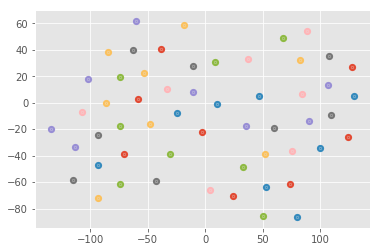

In [15]:
for i in range(0,len(X_2d.index)):
    plt.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1], marker="o", s=5, linewidths=5)
plt.show()

             0           1  labels
0    87.385986   33.186382       1
1    62.759830   91.189178       1
2   -74.550850  -79.205788       1
3    64.896088  -22.063587       1
4  -114.596260   33.370129       1
5   -27.545572 -168.722305       1
6    45.857777 -155.801544       1
7  -109.126236 -138.692719       1
8  -166.564331   67.796082       1
9    73.106895  -90.749359       2
10  -49.359142  154.732346       2
11   -7.456556   88.321732       1
12   54.195755 -549.551392       1
13   20.901512   25.796721       4
14  -84.104500   94.335007       1
15   31.598392  152.913437       2
16  137.046494  -63.053226       2
17 -138.936691  -62.947769       2
18 -306.929291  387.491608       2
19  202.880051  -10.779931       4
20  140.749115    7.104197       4
21  137.644363   90.960289       1
22  -24.194458  -26.676073       1
23  127.644661 -138.151474       0
24 -195.579742  -22.591673       0
25  -86.157578  -16.591473       0
26   20.955418  -60.895329       3
27  -20.463068 -102.

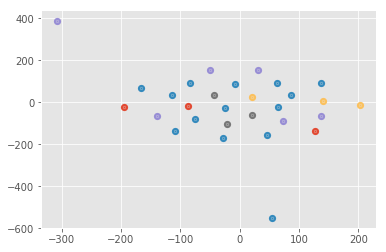

In [43]:

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5',]
print(X_2d)
for label in set(y):
# #     print label
    color = colors[label]
    for i in range(0,len(X_2d.index)):
        if (X_2d.iloc[i][2] == label):
            plt.scatter(X_2d.iloc[i][0], X_2d.iloc[i][1],color = color, marker="o", s=5, linewidths=5)
plt.show()